# Optimització - Descens del gradient

L’optimització matemàtica o la programació matemàtica és la selecció d’un millor element a partir d’un conjunt d’alternatives disponibles. Problemes d’optimització de tipus sorgeixen en totes les disciplines quantitatives, des de la informàtica i l’enginyeria fins a la investigació d’operacions i l’economia, i el desenvolupament de mètodes de solució ha estat d’interès en les matemàtiques durant segles.

En el cas més senzill, un problema d’optimització consisteix a maximitzar o minimitzar una funció real mitjançant l’elecció sistemàtica dels valors d’entrada dins d’un conjunt permès i el càlcul del valor de la funció. 
La generalització de la teoria i tècniques d’optimització a altres formulacions constitueix una àmplia àrea de matemàtiques aplicades. 
Més generalment, l’optimització inclou trobar valors "els millors disponibles" d'alguna funció objectiva donat un domini (o entrada) definits, incloent una varietat de diferents tipus de funcions objectives i diferents tipus de dominis.


Es pot representar un problema d'optimització de la següent manera:

- Tenint en compte: una funció $f : A \to \mathbb{R}$ des d'algun conjunt $A$ als nombres reals.
- Buscat: un element ${x}_0 \in A$ tal que $f({x}_{0}) \leq f({x})$ per a tots els ${x} \in A$ ("minimització") o tal que $f({x}_{0}) \geq f({x})$  per a tots els ${x} \in A$ ("maximització").

La metodologia crítica per resoldre problemes d'optimització és el **descens del gradient**.

**Prior:**
S'anomena *derivada parcial* d'una funció de diverses variables a la seva derivada respecte a una d'aquestes variables, deixant les altres constants. Cada derivada indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

El *gradient* de la funció $f(x_1, \cdots, x_n)$ és un vector format per les derivades parcials de la funció. 
Aquest dóna la direcció en la qual la funció creix més ràpidament. 

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

### 1. Cas Unidimensionals

Suposem que volem calcular el nimim numèric de la següent funció unidimensional:

$$ f_1(x) = x^2 $$

La derivada parcial de la funcio $f$ és:

$$ \frac{\partial f_1}{\partial x} = 2 x$$

El primer pas que farem és visualitzar la funció i veure el comportament del gradient / derivada sobre un conjunt de punts que pertanyen el domini de la funció.

In [1]:
from plot_utils import *

import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    %matplotlib inline

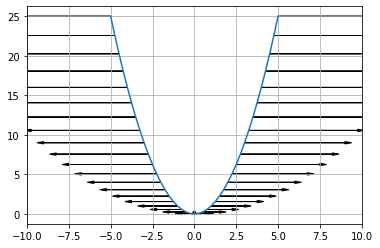

In [2]:
def f1(x):
    return x**2

def df1(x):
    return 2*x

# Function to plot
if __name__ == '__main__':
    X = np.arange(-5, 5.01, 0.25)
    fig = plt.figure()
    plot_1d(X, f1(X), fig)
    plot_gradient (X, f1(X), df1(X), fig=fig)
    fig.gca().set_xlim(-10, 10)

Per tant, una possible estratègia per maximitzar (*minimitzar*) la funció és reptir la següent estratègia:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient.
3. Fer un petit pas en la direcció (*contraria*) del vector gradient: $x^{k+1} = x^{k}-\alpha^{k} \nabla f(x^{k})$
4. Repetir des de 2

La cerca s'acabaria quan el vector gradient és zero, que vol dir que hem trobat un màxim (*mínim*). Donat que la presició flotant potser evita que arribem mai a aquest nombre, afegim dos mètodes més per acabar la cerca:

1. Si el moviment que realitzem és més petit que un epsilon ($|x^{k+1} - x^{k}| < eps$)
2. Si realitzem més de `max_iters` iteracions

Si la funció és **unimodal** (conté un únic màxim (*mínim*)), hem trobat una la nostra solució. 
Sinó, pot ser que estem en un màxim (*mínim*) local i que sigui una solució no satisfactòria.

**Implementa la funció *gradient_descend_1d* seguint el procediment proposat. Durant el procés d'optimització visualitza els punts de la gràfica per on vagis passant.**

Recordeu que els ordinadors generen un error numèric, per tant no heu d'igualar mai a zero, heu de fer servir una tolerància.
Definiu també un nombre màxim d'iteracions que l'algorisme pot realitzar per arribar al punt desitjat.

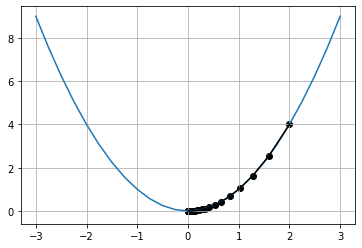

In [58]:
def gradient_descend_1d(grad, x, alpha, eps=1e-3, max_iters=1e2):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, el gradient i el pas, intenta trobar el mínim
    de la funció seguint el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iters: Iteracions màximes a realitzar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array de tamany [X] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Mínim.
    """
    it = 0
    result = []
    xk = 9999
    path = [x]
    while(np.abs(x - xk) > eps and it !=max_iters):
        it +=1
        xk = x
        x = x - alpha*grad(x)
        path.append(x)
    result.append(np.array(path))
    result.append(x)
    return result
    
    raise NotImplementedError()

if __name__ == '__main__':
    X = np.arange(-3, 3.01, 0.25)
    points, minimum = gradient_descend_1d(df1, 2, .1)
    fig = plt.figure()
    plot_gradient_descend_1d(f1, X, points, minimum, fig)

<div style='background: #FCD02C; color: #333; padding: 20px; border-radius: 5px;'>
    <div style='float: right; font-weight: bold;'>2.5/3</div>
    Això de donar un valor inicial fix a xk... O bé hi poseu infinit o feu servir una variable auxiliar o reordeneu el codi. Així fallarà en el cas que la x0 sigui aquest mateix nombre
</div>

Però... són totes els funcions unimodals? Obviament no.

Podem tenir funcions que contenen un màxim i un mínim. Per veure com es comporten aquestes funcions **repeteix el procediment anterior amb aquesta nova funció**.

$$f_2(x) = x^3 - 2x + 2$$

$$ \frac{\partial f_2}{\partial x} = 3x^2 -2 x$$

In [35]:
def f2 ( x ):
    return x**3 - 2*x + 2

def df2(x):
    return 3*x**2 - 2

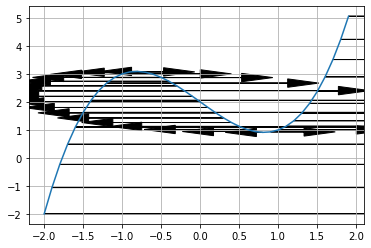

In [36]:
if __name__ == '__main__':
    X = np.arange(-2, 2, 0.1)
    fig = plt.figure()
    plot_1d(X, f2(X), fig)
    plot_gradient(X, f2(X), df2(X), fig=fig)

**Començant en el punt $x=0.75$, és possible arribar a valors de $x < -1$ en 10 o menys iteracions? Fer proves demostrant que es pot, o no, arribar-hi.**

**Justifica el comportament del procés d'optimització**

**Justificació**

Provant el descens per diferents alphas ($alpha=0.01,0.1,0.3,0.5,0.65$) on $0.65$ correspon al alpha més gran possible pel pas, observem que en ningún cas obtenim una $x < -1$. 

També denotem el fet que $x = -1$ es troba en un altre mínim/màxim i per tant el gradient i la seva direcció s'encarreguen de no anar mai cap allà

<div style='background: #FCD02C; color: #333; padding: 20px; border-radius: 5px;'>
    <div style='float: right; font-weight: bold;'>0/2</div>
    Perque dieu que 0.65 és la més gran? Es pot arribar a valors de x < -1 des del punt que us proposem. Amb una alpha prou gran, la multiplicació pel gradient farà que oscil·li al voltant del mínim, fins que al final saltarà per sobre del màxim.
</div>

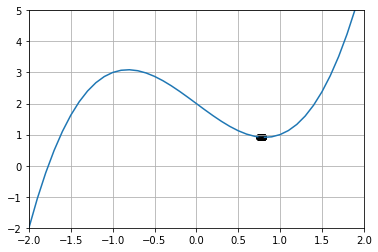

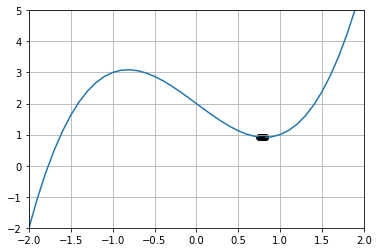

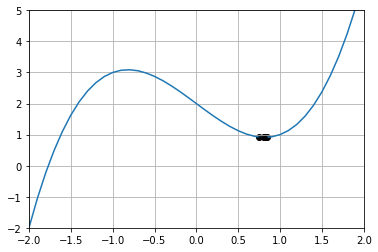

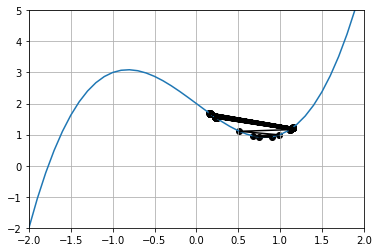

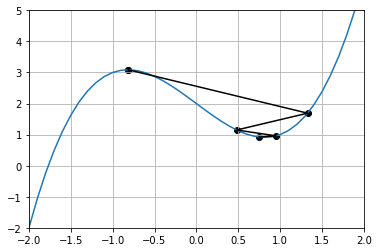

In [61]:
if __name__ == '__main__':
    X = np.arange(-20, 20, 0.1)

    # Fes les proves
    points,minimum = gradient_descend_1d(df2,0.75,0.01)
    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])
    
    points,minimum = gradient_descend_1d(df2,0.75,0.1)
    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])
    
    points,minimum = gradient_descend_1d(df2,0.75,0.3)
    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])
    
    points,minimum = gradient_descend_1d(df2,0.75,0.5)
    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])
    
    points,minimum = gradient_descend_1d(df2,0.75,0.65)
    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])


<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

#### Podem assegurar que sempre arribem a un minim?

Suposa ara la funció
$$
f_{2.2}(x) = \frac{x}{1+x^2}
$$
amb gradient
$$ \frac{\partial f_{2.2}}{\partial x} = \frac{1-x^2}{(1+x^2)^2}
$$

**Resposta**

Executant per diferents valors observem que si el punt inicial es troba entre un altre conjunt màxim/mínim el gradient mai apuntarà cap el mínim que volem i per tant mai s'arribará. Quan comencem en un punt del nostre conjunt màxim/mínim sempre hi arribem.

<div style='background: #FCD02C; color: #333; padding: 20px; border-radius: 5px;'>
    <div style='float: right; font-weight: bold;'>2/2</div>
    Bé
</div>

In [62]:
def f2_2(x):
    return x / (1 + x**2)

def df2_2(x):
    return (1 - x**2) / (1 + x**2)**2

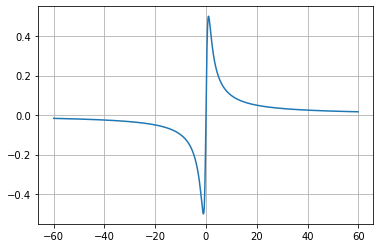

In [63]:
if __name__ == '__main__':
    X = np.arange(-60, 60, 0.1)
    fig = plt.figure()
    plot_1d(X, f2_2(X), fig)

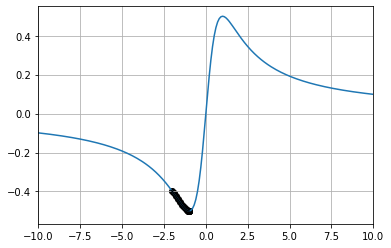

In [73]:
if __name__ == '__main__':
    x0 = (np.random.random() - 0.5) * 10
    points, minimum = gradient_descend_1d(df2_2, x0, 1)

    fig = plt.figure()
    plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
    fig.gca().set_xlim([-10, 10])

**Justifica el comportament per diferent punts d'inici. Podem arribar sempre al mínim? **

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

### Cas N-dimensionals

Podem aplicar el procediment anterior quan tenim funcions dos-dimensionals? La resposta és que sí. 

L'unic canvi en el procediment és que ara caldrà avançar en dues direccions.

Sigui la funció 2-dimensional $f_3$:
$$ f_3(x_1, x_2) = x_1^2 + x_2^2$$

i el seu gradient:

$$\nabla {f_3(x_1, x_2)} = 
\left( \frac{\partial f_3}{\partial x_1}, \frac{\partial f_3}{\partial x_2}\right) = 
\left( 2 x_1, 2 x_2 \right)$$

Visualitza la forma de grafica i el comportament del seu gradient.

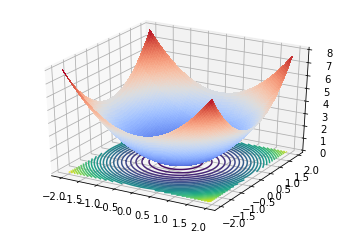

In [74]:
def f3 ( x, y ):
    return x**2 + y**2

def grad_f3(x, y=None):
    return np.asarray((2 * x, 2 * y))

if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    X, Y, Z = generate_grid(f3)
    plot_2d(X, Y, Z, fig)

Per veure millor el gradient en aquest cas, podem imprimir el seu comportament en un pla.

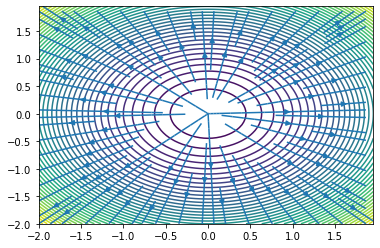

In [75]:
if __name__ == '__main__':
    fig = plt.figure()
    project_gradient(f3, grad_f3, fig)

Implamenteu l'algorisme anterior amb el cas 2-dimensional.

Recordeu amb amb la llibreria numpy podeu sumar o restar vectors, multiplicar per un escalar, etc.

In [81]:
def gradient_descend_2d(gradient, x, alpha=0.1, eps=1e-6, max_iter=1000, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    """
    it = 0
    result = []
    xk = (9999,9999)
    path = [x]
    while(np.abs(x[0]-xk[0]) > eps and (np.abs(x[1]-xk[1]) )> eps and it !=max_iter):
        it +=1
        xk = x
        x = x - alpha*gradient(x[0],x[1])
        path.append(x)
    result.append(np.array(path))
    result.append(x)
    if(verbose):
        print(it)
    return result
    raise NotImplementedError

if __name__ == '__main__':
    x0 = np.asarray([1, 1])
    points, minimum = gradient_descend_2d(grad_f3, x0)

56


<div style='background: #FCD02C; color: #333; padding: 20px; border-radius: 5px;'>
    <div style='float: right; font-weight: bold;'>2.5/3</div>
    Bé, tot i que millor que fer el valor absolut de cada component, podrieu fer la norma. Com l'anterior, compta amb el punt d'inici. Per retornar una tupla no heu de fer tanta cosa
    
    return element1, element2
    return (element1, element2)
    return [element1, element2]
</div>

Minimum:  [0. 0.]


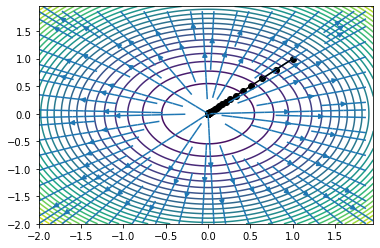

In [82]:
if __name__ == '__main__':
    print ("Minimum: ", np.round(minimum,3))

    fig = plt.figure()
    X, Y, _ = generate_grid(f3)
    plot_gradient_descend_2d(f3, grad_f3, X, Y, points, minimum, fig)

Considera ara la funció
$$f_4(x_1, x_2) = 100(x_1^2 + x_2^2)$$

amb gradient

$$\nabla {f_4(x_1, x_2)} = 
\left( \frac{\partial f_4}{\partial x_1}, \frac{\partial f_4}{\partial x_2}\right) = 
\left( 200 x_1, 200 x_2 \right)$$

En aquest cas, igual que en molts altres, és més útil utilizar el gradient normalizat per aplicar l'algorisme. 

** Fent servir `gradient_descend_2d`, podeu trobar el mínim de les funcions $f_3$ i $f_4$ amb el següents paràmetres:**

* $\alpha$ igual en les dues crides, es pot modificar
* $x=(1, 1)$ en les dues crides
* `max_iter=100` en les dues crides
* `eps=1e-6` en les dues crides

**Justifica perque són capaços, o no, de trobar el mínim amb aquest paràmetres. Quines dificultats presenta?**

La funció grad_f3 troba el mínim per valors d'alfa grans, entre 0 i 1, ja que per fer el següent moviment multiplica la x per 2. Per alfa amb valor molt petit es mou lentament i no arriba a trobar el mínim.

En canvi grad_f4 troba el mínim per valors d'alfa petits, com 0,001, ja que per fer el següent moviment multiplica per 200. Per alfa amb valor més gran la funció no es capaç de trobar el mínim perquè s'apropa molt lentament saltant d'un costat a un altre del mínim.

<div style='background: #FCD02C; color: #333; padding: 20px; border-radius: 5px;'>
    <div style='float: right; font-weight: bold;'>2/2</div>
    Bé
</div>

In [98]:
def f4(x, y):
    return 100 * (x**2 + y**2)

def grad_f4(x, y):
    return np.asarray((200 * x, 200 * y))

In [99]:
if __name__ == '__main__':
    x0 = np.asarray((1, 1))
    alpha = 0.001
    points_f3, minimum_f3 = gradient_descend_2d(grad_f3, x0, alpha=alpha, max_iter=100, eps=1e-6)
    points_f4, minimum_f4 = gradient_descend_2d(grad_f4, x0, alpha=alpha, max_iter=100, eps=1e-6)

100
56


[0.8185668 0.8185668]


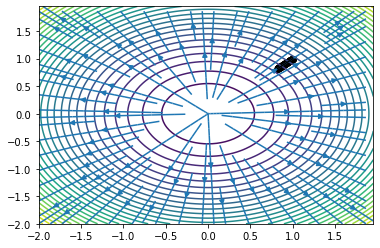

In [100]:
if __name__ == '__main__':
    fig = plt.figure()
    X, Y, _ = generate_grid(f3)
    plot_gradient_descend_2d(f3, grad_f3, X, Y, points_f3, minimum_f3, fig)
    print(minimum_f3)

[3.74144419e-06 3.74144419e-06]


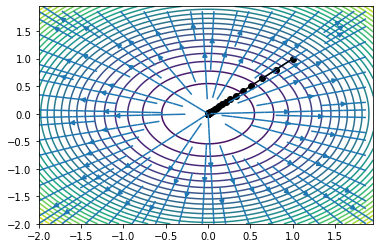

In [97]:
if __name__ == '__main__':
    fig = plt.figure()
    X, Y, _ = generate_grid(f4)
    plot_gradient_descend_2d(f4, grad_f4, X, Y, points_f4, minimum_f4, fig)
    print(minimum_f4)

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

## Temps de convergència

Observa ara la següent funció, anomenada funció de **Rosenbrock**.

$$ f(x_1, x_2) = (a - x_1)^2 + b (x_2 - x_1^2)^2$$

**El mínim d'aquesta funció es troba al punt: $(x_1, x_2) = (a, a^{2})$.**

In [113]:
A_ROS = 1

def f_ros(x, y, a=A_ROS, b=10):
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y, a=A_ROS, b=10):
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

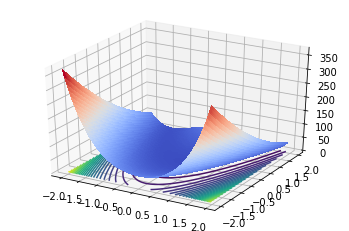

In [114]:
if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    X, Y, Z = generate_grid(f_ros)
    plot_2d(X, Y, Z, fig)

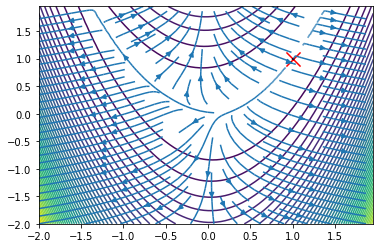

In [115]:
if __name__ == '__main__':
    fig = plt.figure()
    project_gradient(f_ros, grad_f_ros, fig)
    plt.scatter(A_ROS, A_ROS**2, marker='x', color='r', s=200)

Aquesta funció té un mínim molt pla, la pendent és pràcticament nula al sel voltat, pel que els mètodes iteratius tarden molt a trobar el mínim

1901
[0.99974726 0.99948443]


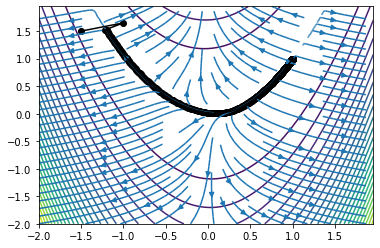

In [116]:
if __name__ == '__main__':
    fig = plt.figure()
    x0 = np.asarray((-1.5, 1.5))
    points, minimum = gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000)
    X, Y, _ = generate_grid(f_ros)
    plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
    print(minimum)

## Trobant el pas òptim

Una possibilitat per fer menys iteracions i accelerar la convergència és trobant el valor de $\alpha$ automàticament a cada pas, és a dir aquella $\alpha$ que fa mínim el valor de $f$.

L'algorisme és tal que:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient
3. $\alpha = 10$
4. Calcular $x^{k+1} = x^{k}-\alpha \nabla f(x^{k})$
5. Si $f(x^{k+1}) > f(x^{k})$, $\alpha = \alpha / 2$, descartar $x^{k+1}$ i tornar al pas 4
6. En cas contrari, moure's a $x^{k+1}$ i repetir des de 2

In [163]:
def gradient_descend_2d_auto(f, gradient, x, eps=1e-6, max_iter=1000, initial_alpha=10, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param f: Funció a minimitzar
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param initial_alpha: Pas inicial a cada iteració, corresponent al punt 3 anterior
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    """
    it = 0
    alpha = initial_alpha
    result = []
    xk = (9999,9999)
    path = [x]
    while(np.abs(x[0]-xk[0]) > eps and (np.abs(x[1]-xk[1])) > eps and it !=max_iter):
        it +=1
        xk = x.copy()
        x = x - alpha*gradient(x[0],x[1])
        if f(x[0],x[1]) > f(xk[0],xk[1]):
            x = xk.copy()
            xk = (9999,9999)
            alpha /= 2
            it-=1
        else:
            alpha = initial_alpha
            path.append(x)
    result.append(np.array(path))
    result.append(x)
            
    if(verbose):
        print(it)
        
    return result
    raise NotImplementedError

<div style='background: #FCD02C; color: #333; padding: 20px; border-radius: 5px;'>
    <div style='float: right; font-weight: bold;'>1/1</div>
    Bé
</div>

412
[0.99650169 0.99273072]


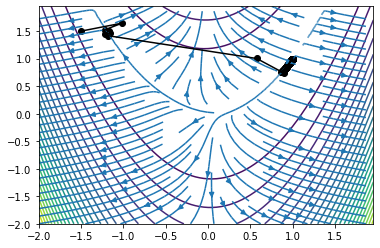

In [164]:
if __name__ == '__main__':
    fig = plt.figure()
    x0 = np.asarray((-1.5, 1.5))
    points, minimum = gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000)
    X, Y, _ = generate_grid(f_ros)
    plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
    print(minimum)

In [165]:
if __name__ == '__main__':
    %timeit gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000, verbose=False)

20.8 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [166]:
if __name__ == '__main__':
    %timeit gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000, verbose=False)

68.3 ms ± 6.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<div style='background: #FCD02C; color: #333; padding: 20px; border-radius: 5px;'>
    <div style='float: right; font-weight: bold;'>11/13</div>
    Bastant bé en general
</div>